In [38]:
import pandas as pd

In [39]:
data = pd.read_table('/media/data/nlp/sentiment/stanfordSentimentTreebank/datasetSentences.txt')
splits = pd.read_table('/media/data/nlp/sentiment/stanfordSentimentTreebank/datasetSplit.txt')
labels = pd.read_table('/media/data/nlp/sentiment/stanfordSentimentTreebank/')

# TorchText

In [23]:
from random import random

import torch
import torchtext

import numpy as np

In [29]:
ALPHABET = ['<UNK>'] + ['\n'] + [s for s in """ 0123456789-,;.!?:'’’/\|_@#$%ˆ&* ̃‘+-=<>()[]{}"""]
ALPHABET += [s for s in 'abcdefghijklmnopqrstuvwxyz']

MAXLEN = 512

text_field = torchtext.data.Field(
    lower=True, include_lengths=False, fix_length=2048, tensor_type=torch.FloatTensor, batch_first=True,
    tokenize=lambda x: x, use_vocab=False, sequential=False
)
label_field = torchtext.data.Field(sequential=False, use_vocab=False)

class CharSST(torchtext.datasets.sst.SST):
    noise_level = 0

    def __getitem__(self, idx):
        item = super(CharSST, self).__getitem__(idx)
        text = item.text
        text = self._noise_generator(text)  # это плохо
        label = int(item.label == 'pos')
        text = self._preprocess(text)
        return text, label

    def _noise_generator(self, string):
        noised = ""
        for c in string:
            if random() > self.noise_level:
                noised += c
            if random() < self.noise_level:
                noised += choice(ALPHABET)
        return noised

    def _one_hot(self, char):
        zeros = np.zeros(len(ALPHABET))
        if char in self.char2int:
            zeros[self.char2int[char]] = 1.
        else:
            zeros[self.char2int['<UNK>']] = 1.

    def _preprocess(self, text):
        text = text.lower()
        one_hotted_text = np.zeros((self.maxlen, len(ALPHABET)))
        for i, char in enumerate(text):
            if i >= self.maxlen:
                break
            one_hotted_text[i, self.char2int.get(char, self.char2int['<UNK>'])] = 1.

# From torchtext

In [ ]:
torchtext.datasets.sst.SST

In [56]:
train, val, test = torchtext.datasets.sst.SST.splits(text_field, label_field)

In [76]:
from matplotlib import pyplot as plt
import seaborn
seaborn.set()

%matplotlib inline

(array([ 598., 1385., 1616., 1691., 1371.,  969.,  546.,  243.,  103.,
          22.]),
 array([  4. ,  31.9,  59.8,  87.7, 115.6, 143.5, 171.4, 199.3, 227.2,
        255.1, 283. ]),
 <a list of 10 Patch objects>)

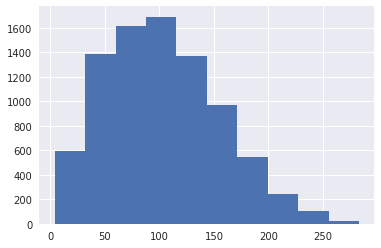

In [77]:
plt.hist([len(train[i].text) for i in range(len(train))])

In [37]:
len(train[0].text)

181

In [50]:
set(train[i].label for i in range(len(train)))

{'negative', 'neutral', 'positive'}

In [70]:
data_train = []
data_val = []
data_test = []

for line in train:
    if line.label != 'neutral':
        data_train.append({'text': line.text, 'sentiment': line.label})

for line in val:
    if line.label != 'neutral':
        data_val.append({'text': line.text, 'sentiment': line.label})

for line in test:
    if line.label != 'neutral':
        data_test.append({'text': line.text, 'sentiment': line.label})

In [71]:
len(data_train), len(data_val), len(data_test)

(6920, 872, 1821)

In [72]:
pd.DataFrame(data_train).to_csv('/media/data/nlp/sentiment/stanfordSentimentTreebank/splits/train.csv')
pd.DataFrame(data_val).to_csv('/media/data/nlp/sentiment/stanfordSentimentTreebank/splits/validation.csv')
pd.DataFrame(data_test).to_csv('/media/data/nlp/sentiment/stanfordSentimentTreebank/splits/test.csv')